---------------------------
#### The SummaryIndex
----------------------------

#### Difference between VectorStoreIndex and Summary Index in LlamaIndex

**• VectorStoreIndex:**
   - Designed to store and retrieve document embeddings efficiently.
   - Embeddings (vector representations of documents) are stored in a vector database or vector store.
   - Useful for semantic search, where queries are embedded, and then similarity between the query vector and document vectors is computed.
   - Ideal for applications requiring fast and accurate similarity search across large sets of documents or data points.
   - Supports real-time querying where documents are embedded and stored in the index for quick look-up.

**• Summary Index:**
   - Focuses on summarizing large sets of documents or data.
   - Instead of storing vectors for semantic similarity search, it creates high-level summaries of the documents.
   - Useful when you want to extract key points, overviews, or condensed versions of large text collections.
   - Ideal for cases where you need human-readable summaries rather than vector-based similarity matching.
   - Helps in quickly understanding the essence of multiple documents without going into granular detail.

**Summary:**
   - The **VectorStoreIndex** is built for efficient vector-based document retrieval, enabling fast semantic searches. 
   - The **Summary Index** focuses on summarizing content, offering concise overviews of documents rather than optimizing for search.


#### Examples of VectorStoreIndex and Summary Index usage in LlamaIndex

**• VectorStoreIndex Example:**
   ```python
   from llama_index import VectorStoreIndex
   from llama_index.embeddings.huggingface import HuggingFaceEmbedding
   
   # Initialize a HuggingFace embedding model
   embedding_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-MiniLM-L6-v2")
   
   # Create a VectorStoreIndex using the embedding model
   vector_index = VectorStoreIndex(
       documents=documents,  # list of document objects
       embedding_model=embedding_model
   )
   
   # Perform a semantic search
   query = "What are the benefits of deep learning?"
   response = vector_index.query(query)
   print(response)


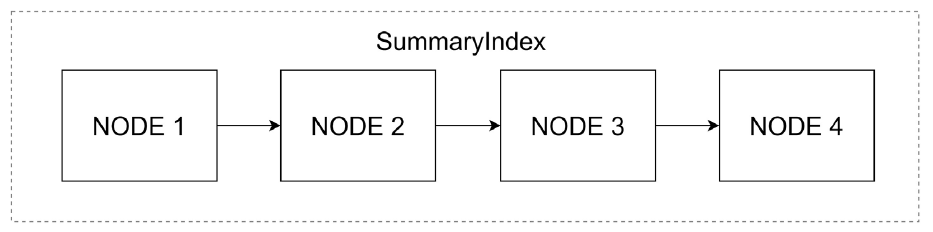

#### Practical Use Case: Documentation Search Tool for a Software Project

In large software projects, documentation often includes:
- **Technical Specifications**
- **API Documentation**
- **User Guides**
- **Developer Notes**

This accumulation of information can make it difficult for developers to locate relevant details when needed quickly.

#### Use of SummaryIndex
By implementing a **SummaryIndex** for the project’s documentation repository, the tool can allow developers to:
- **Query specific information** such as "What are the error handling procedures for the payment gateway API?"
- **Retrieve relevant sections** from the indexed documents without relying on sophisticated embeddings or costly computational resources.

#### Advantages of SummaryIndex in This Scenario:
1. **Lightweight Processing**:
   - SummaryIndex is less resource-intensive compared to a VectorStoreIndex, which requires embedding vectors.
   - Ideal for small to medium-sized documentation repositories where real-time semantic similarity search isn’t necessary.

2. **Simplicity**:
   - A linear scan through the indexed documents is often enough to pull the necessary information.
   - It’s a good solution when computational complexity isn’t desired, such as in a small team setting or when simplicity is prioritized over precision.

3. **Speed**:
   - Since there’s no need for complex embeddings or vector databases, the search process is faster and less dependent on cloud resources or local processing power.

#### How It Would Work:
When a developer queries **"What are the error handling procedures for the payment gateway API?"**, the SummaryIndex would scan through the documentation, extract relevant sections related to error handling for the payment gateway, and return these snippets.

This approach allows the team to:
- Quickly reference documentation without needing a large vector database or semantic embeddings.
- Enable a search function that is fast, lightweight, and easy to maintain.

#### When to Use VectorStoreIndex Instead:
- If the repository grows large, or if developers need more advanced semantic search capabilities (e.g., searching through vast archives or needing domain-specific retrieval), a **VectorStoreIndex** would provide better results by utilizing vector embeddings for deeper semantic understanding.

In summary, **SummaryIndex** is an excellent choice for teams that need a lightweight, fast, and simple search solution without the overhead of embedding models.


In [3]:
from llama_index.core import SummaryIndex

In [4]:
from llama_index.core import SimpleDirectoryReader

In [5]:
documents = SimpleDirectoryReader("files").load_data()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\ANACONDA\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "D:\ANACONDA\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "D:\ANACONDA\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "D:\ANACONDA\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: `llama-index-readers-file` package not found

In [4]:
index = SummaryIndex.from_documents(documents)

In [5]:
query_engine = index.as_query_engine()

In [6]:
response = query_engine.query("How many documents have you loaded?")
print(response)

Two documents.


#### Understanding the Inner Workings of the SummaryIndex

The **SummaryIndex** functions by storing each document or section in a **list-like structure**, allowing for efficient iteration during queries.

#### Key Mechanism:
- **Node Storage**: Documents are broken down into nodes and stored in a simple, linear fashion (like a list).
- **Query Execution**: During a query, the **SummaryIndex** iterates through its stored nodes to identify relevant sections.
  - This process lacks the complexity of embedding-based searches (like in **VectorStoreIndex**), but for many simpler applications, it's still highly effective.

#### Retrievers:
The **SummaryIndex** can work with various retrievers, providing flexibility for different use cases:
1. **SummaryIndexRetriever**: Basic node retrieval mechanism.
2. **SummaryIndexEmbeddingRetriever**: Incorporates embeddings for more refined searches.
3. **SummaryIndexLLMRetriever**: Leverages language models (LLMs) for query resolution.

#### Create & Refine Approach:
When a query is made, the **SummaryIndex** follows a **create and refine** method to formulate the response:

1. **Initial Response**: 
   - The system generates a preliminary answer based on the first chunk of text.
   
2. **Refinement**:
   - The initial answer is refined by incorporating additional text chunks as context.
   - The process may involve:
     - **Maintaining** the original answer.
     - **Slightly modifying** the initial response to better suit the query.
     - **Rephrasing** or significantly changing the initial response based on additional information.

#### Benefits of this Approach:
- **Efficient for linear queries**: The list-like structure allows for quick retrievals when more advanced vector-based searches are not necessary.
- **Contextual Refinement**: Ensures that answers evolve as new information is brought in, leading to more accurate responses in some scenarios.

#### Example Workflow:
1. A query is submitted: **"What is the data retention policy?"**
2. The **SummaryIndex** retrieves the first relevant node and formulates a rough answer.
3. Additional nodes provide context (e.g., different sections of a document discussing retention policy specifics).
4. The response is refined based on the new chunks, resulting in a more polished and informative output.

This method balances simplicity with adaptability, making the **SummaryIndex** useful for applications where **complex embeddings** are **not necessary**.
